In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [5]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["species"] = iris.target

In [7]:
X = df.iloc[:, :-1]
y = df["species"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
k = 5   # You can change K
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
y_pred = model.predict(X_test)

In [15]:
print(f"Accuracy for K={k}:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy for K=5: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [17]:
cm = confusion_matrix(y_test, y_pred)

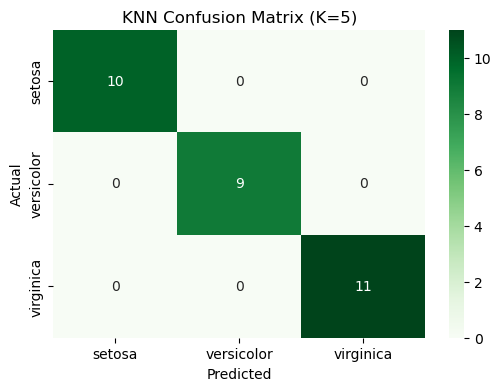

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"KNN Confusion Matrix (K={k})")
plt.show()

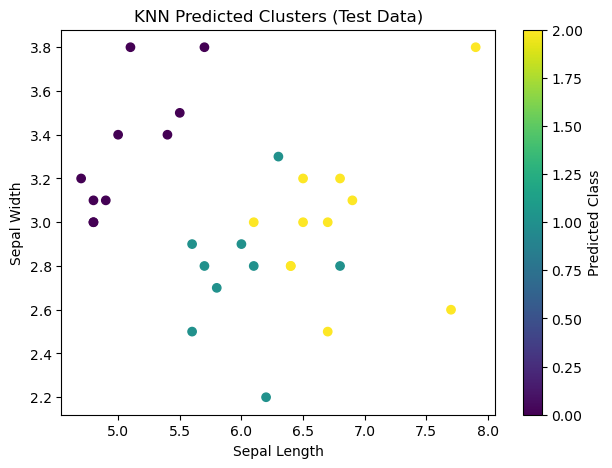

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='viridis', label="Predicted")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("KNN Predicted Clusters (Test Data)")
plt.colorbar(label="Predicted Class")
plt.show()